Epoch 1/10
422/422 [==============================] - 85s 201ms/step - loss: 0.0210 - val_loss: 0.0024
Epoch 2/10
422/422 [==============================] - 85s 201ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 3/10
422/422 [==============================] - 83s 197ms/step - loss: 0.0012 - val_loss: 9.4997e-04
Epoch 4/10
422/422 [==============================] - 84s 198ms/step - loss: 8.4196e-04 - val_loss: 7.6021e-04
Epoch 5/10
422/422 [==============================] - 83s 197ms/step - loss: 7.0651e-04 - val_loss: 6.5829e-04
Epoch 6/10
422/422 [==============================] - 85s 201ms/step - loss: 6.3337e-04 - val_loss: 5.9972e-04
Epoch 7/10
422/422 [==============================] - 83s 197ms/step - loss: 5.7999e-04 - val_loss: 5.5127e-04
Epoch 8/10
422/422 [==============================] - 84s 199ms/step - loss: 4.9221e-04 - val_loss: 4.4395e-04
Epoch 9/10
422/422 [==============================] - 83s 196ms/step - loss: 4.0291e-04 - val_loss: 3.9893e-04
Epoch 10/10
313/313 [

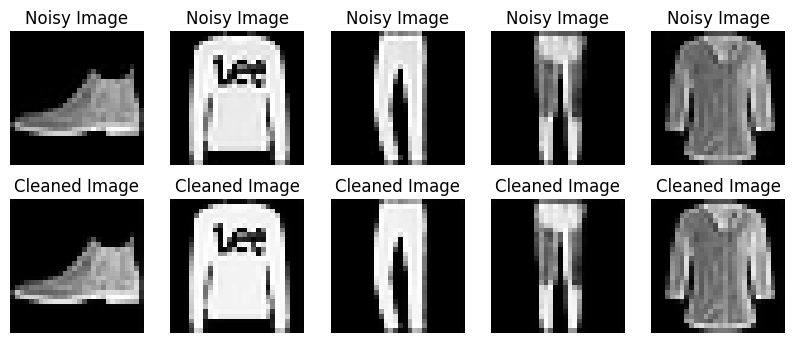

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Expand dimensions to add channel dimension (since the generator expects images with shape [batch_size, height, width, channels])
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define the generator model
def build_generator(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    # Add more convolutional layers as needed
    outputs = Conv2D(input_shape[-1], (3, 3), padding='same', activation='sigmoid')(x)
    return Model(inputs, outputs)

# Define the discriminator model (optional, depending on the architecture)
# This discriminator can be a simple binary classifier or a more complex one if needed

# Define loss function (e.g., mean squared error)

# Build and compile the generator model
input_shape = x_train.shape[1:]  # Use the shape of the images in the dataset
generator = build_generator(input_shape)
generator.compile(optimizer=Adam(), loss='mean_squared_error')

# Define training parameters
num_epochs = 10
batch_size = 128
validation_split = 0.1

# Train the generator using the paired dataset of noisy and clean images
generator.fit(x_train, x_train, epochs=num_epochs, batch_size=batch_size, validation_split=validation_split)

# Generate clean images from noisy images
cleaned_images = generator.predict(x_test)

# Display sample noisy and cleaned images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title('Noisy Image')
    plt.axis('off')
    plt.subplot(2, 5, i + 6)
    plt.imshow(cleaned_images[i].squeeze(), cmap='gray')
    plt.title('Cleaned Image')
    plt.axis('off')
plt.show()
